In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('train_final.zip')

In [3]:
def _low_mem_mgmt(df):
    df[['meter','site_id','building_id','square_feet']] = df[['meter','site_id', 'building_id', 'square_feet']].astype('int32')

    # Change the dtypes (float64 -> float32)
    df[['meter_reading', 'year_built','floor_count', 'air_temperature', 'cloud_coverage',
        'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
        'wind_direction','wind_speed']] = df[['meter_reading', 'year_built',
        'floor_count', 'air_temperature', 'cloud_coverage',
        'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
        'wind_direction','wind_speed']].astype('float32')
    return df

In [4]:
df = _low_mem_mgmt(df)

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.drop(columns=['year_built', 'floor_count'], inplace=True)

# Check Missing Value %

In [7]:
df.isnull().sum()/len(df)

meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
building_id           0.000000
primary_use           0.000000
square_feet           0.000000
air_temperature       0.004781
cloud_coverage        0.436551
dew_temperature       0.004953
precip_depth_1_hr     0.185447
sea_level_pressure    0.060925
wind_direction        0.071678
wind_speed            0.007107
dtype: float64

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15,8)})

# Imputing Missing Values using regression

In [33]:
k = df[['air_temperature','dew_temperature']].dropna()

In [10]:
k.head()

,air_temperature,dew_temperature
0,25.0,20.0
1,25.0,20.0
2,25.0,20.0
3,25.0,20.0
4,25.0,20.0


In [11]:
b = k.drop_duplicates().reset_index(drop=True)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

c:\programs files\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
polynomial_features= PolynomialFeatures(degree=5)
# x_poly = polynomial_features.fit_transform(b['dew_temperature'].values.reshape(-1,1))
x_poly = b['dew_temperature'].values.reshape(-1,1)

In [14]:
# model = LinearRegression()
# model = GradientBoostingRegressor(learning_rate=0.68, warm_start=True)
model = RandomForestRegressor(n_estimators=300)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, b['air_temperature'], test_size=0.33, random_state=42)

In [16]:
model.fit(X_train, y_train)
y_poly_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_poly_pred))

7.229657946609341

In [86]:
# sns.scatterplot(x="dew_temperature", y="air_temperature", data=b)
# plt.plot(X_test, y_poly_pred, color='r')

In [24]:
df[['air_temperature','dew_temperature']].describe()

,air_temperature,dew_temperature
count,2.011944e+07,2.011596e+07
mean,1.598795e+01,7.747426e+00
std,1.094729e+01,1.017867e+01
min,-2.890000e+01,-3.500000e+01
25%,8.600000e+00,0.000000e+00
50%,1.670000e+01,8.900000e+00
75%,2.410000e+01,1.610000e+01
max,4.720000e+01,2.610000e+01


c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


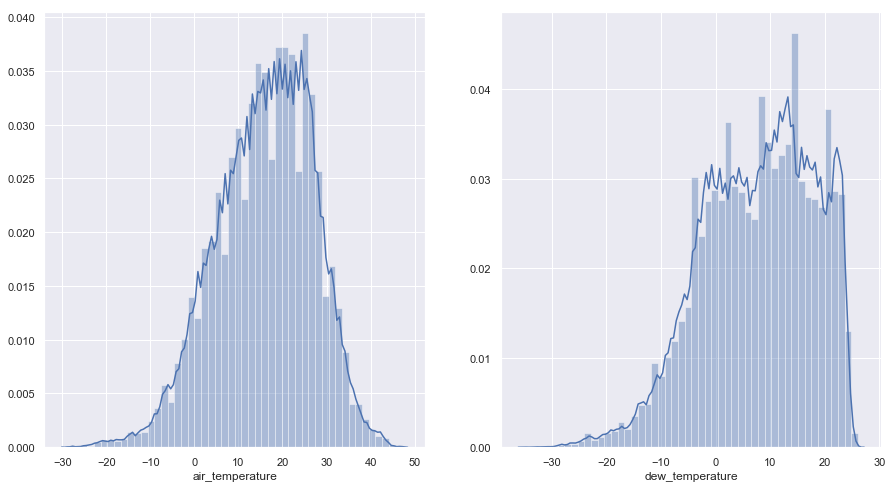

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=1)
sns.distplot(df[df['site_id']==0]['air_temperature'].dropna(), ax=axs[0])
sns.distplot(df[df['site_id']==0]['dew_temperature'].dropna(), ax=axs[1])

In [46]:
# for i in list(df['site_id'].unique()):
#     fig, axs = plt.subplots(ncols=2, nrows=1)
#     tmp_df = df[df['site_id']==i].copy()  
#     sns.distplot(tmp_df['air_temperature'].dropna(), ax=axs[0])
#     sns.distplot(tmp_df['dew_temperature'].dropna(), ax=axs[1])
#     axs[0].set_title(f'Site_ID_{i}',  fontdict={'fontsize': 30, 'fontweight': 'bold'})
#     axs[1].figure.savefig(f"visual/test_{i}.png")

In [62]:
def _create_wind_wind_dr_plot():
    sns.set(rc={'figure.figsize':(40, 40)})
    %matplotlib agg
    %matplotlib agg
    fig, axs = plt.subplots(ncols=4, nrows=4)
    axs = axs.reshape(-1,1).tolist()
    axss = [i for x in axs for i in x]
    for i in list(df['site_id'].unique()):
        tmp_df = df[df['site_id']==i].copy()
        sns.distplot(tmp_df['air_temperature'].dropna(), hist=False ax=axss[i, 0])
        sns.distplot(tmp_df['dew_temperature'].dropna(), hist=False, ax=axss[i, 1])
        plt.legend(['Air_Temp', 'Dew_Temp'])
        axss[i,].set_title(f'Site_ID_{i}',  fontdict={'fontsize': 30, 'fontweight': 'bold'})

    axss[i].figure.savefig(f"visual/testtest.png")
    return 'DONE'

In [63]:
_create_wind_wind_dr_plot()

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'DONE'

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


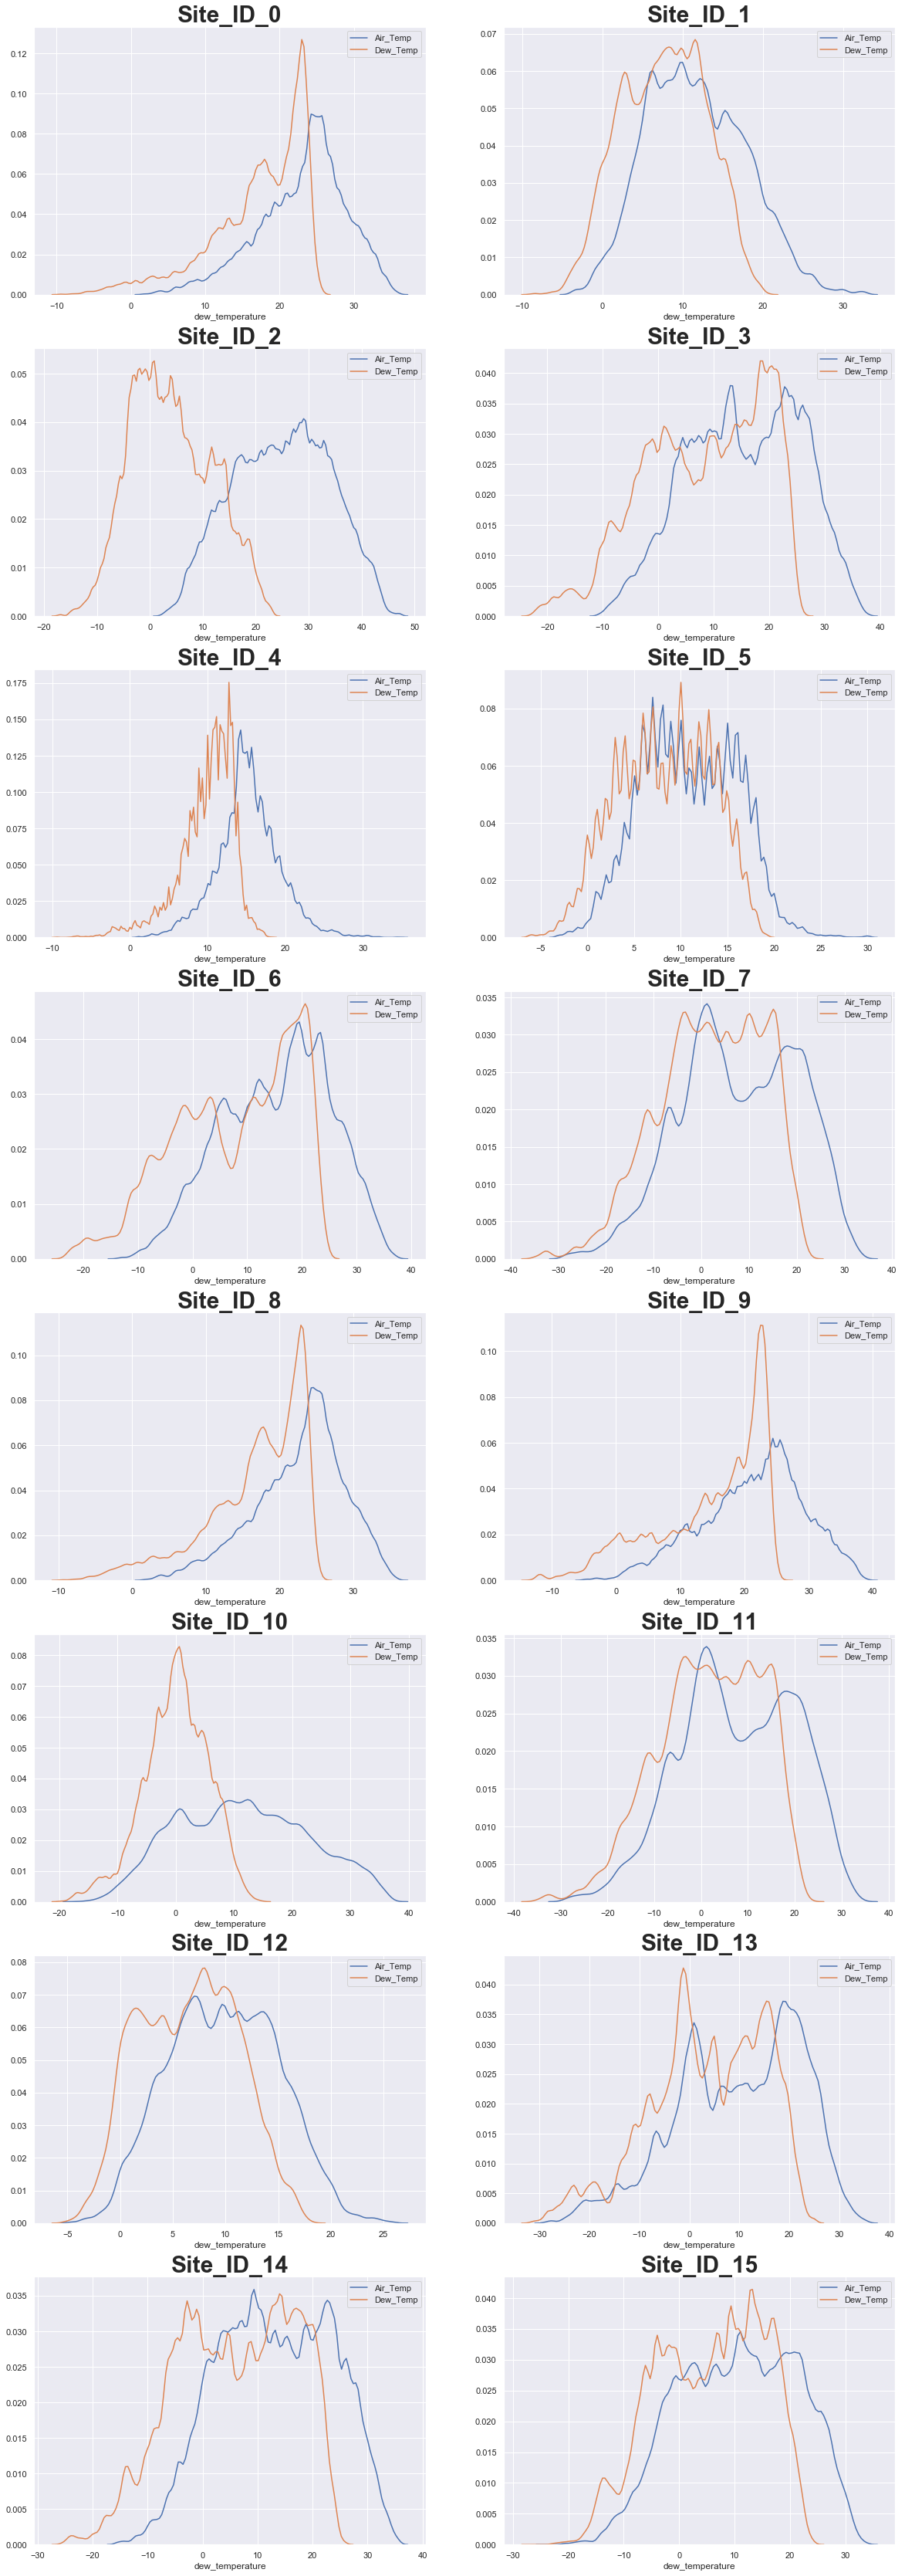

In [100]:
fig, axs = plt.subplots(ncols=2, nrows=8)
sns.set(rc={'figure.figsize':(20, 120)})
axs = axs.reshape(-1,1).tolist()
axss = [i for x in axs for i in x]
for i in list(df['site_id'].unique()):
    tmp_df = df[df['site_id']==i].copy()
    sns.distplot(tmp_df['air_temperature'].dropna(), hist=False, ax=axss[i], label='Air_Temp')
    sns.distplot(tmp_df['dew_temperature'].dropna(), hist=False, ax=axss[i], label='Dew_Temp')
    axss[i].set_title(f'Site_ID_{i}',  fontdict={'fontsize': 30, 'fontweight': 'bold'})
axss[i].figure.savefig(f"visual/testtest.png")